In [1]:
import os
from itertools import chain
import anndata as ad
import itertools
import networkx as nx
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plto9ujqwqwqqw  

/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)
os.chdir('/home/gaojie/workspace/Mida_collab/')

In [3]:
glue = scglue.models.load_model("Multi-omics_intergration/output/glue.dill")

[INFO] autodevice: Using CPU as computation device.


In [4]:
rna = sc.read_h5ad('Multi-omics_intergration/output/adata_rna_output.h5ad')
atac = sc.read_h5ad('Multi-omics_intergration/output/adata_atac_output.h5ad')

In [5]:
guidance = nx.read_graphml("Multi-omics_intergration/data/guidance.graphml.gz")

In [6]:
(rna.var['highly_variable']==True).sum()

5669

In [7]:
guidance_hvf = guidance.subgraph(chain(
    rna.var.query("highly_variable").index,
    atac.var.query("highly_variable").index
)).copy()

In [8]:
rna = sc.read_h5ad('Multi-omics_intergration/V3_output/adata_rna_output.h5ad')

In [9]:
rna

AnnData object with n_obs × n_vars = 28272 × 30696
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample', 'celltype', 'omic', 'celltype_sample', 'balancing_weight'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'TF', 'exp_ratio', 'chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts', 'gene_id', 'gene_ve

In [10]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep='X_pca',use_cell_type='celltype'
)

[WARNING] configure_dataset: `configure_dataset` has already been called. Previous configuration will be overwritten!


In [11]:
scglue.models.configure_dataset(
    atac, "NB", use_highly_variable=True,
    use_rep='X_lsi',
)

[WARNING] configure_dataset: `configure_dataset` has already been called. Previous configuration will be overwritten!


In [12]:
dx = scglue.models.integration_consistency(
    glue, {"rna": rna, "atac": atac}, guidance_hvf,
)
dx

/data/gaojie/miniforge3/envs/glue/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.

[INFO] integration_consistency: Using layer "counts" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "atac"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "rna"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "atac"
[INFO] get_metacells: Clustering metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will cha

[INFO] get_metacells: Aggregating metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


[INFO] metacell_corr: Computing correlation on 10 common metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


[INFO] get_metacells: Clustering metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will cha

[INFO] get_metacells: Aggregating metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


[INFO] metacell_corr: Computing correlation on 20 common metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


[INFO] get_metacells: Clustering metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will cha

[INFO] get_metacells: Aggregating metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


[INFO] metacell_corr: Computing correlation on 50 common metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


[INFO] get_metacells: Clustering metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will cha

[INFO] get_metacells: Aggregating metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


[INFO] metacell_corr: Computing correlation on 97 common metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


[INFO] get_metacells: Clustering metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will cha

[INFO] get_metacells: Aggregating metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


[INFO] metacell_corr: Computing correlation on 189 common metacells...


/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


,n_meta,consistency
0,10,0.192930
1,20,0.202804
2,50,0.174295
3,100,0.134932
4,200,0.093644


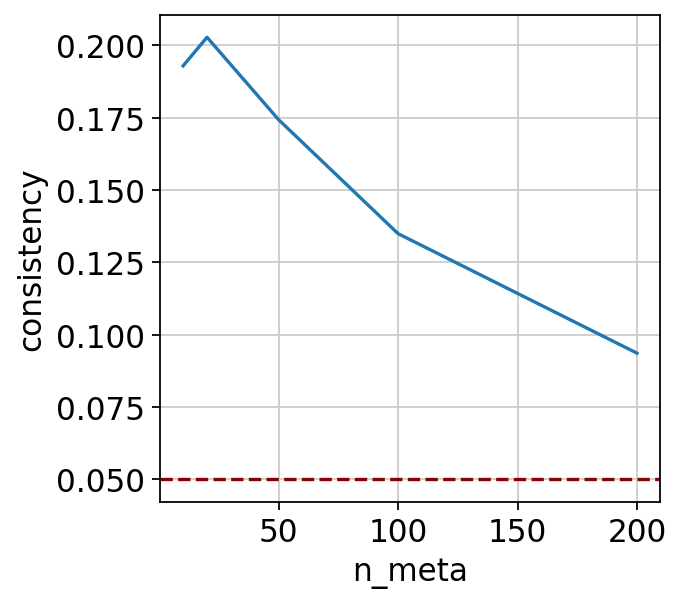

In [13]:
_ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

In [14]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

In [15]:
sc.pp.neighbors(atac,use_rep='X_lsi_harmony')
sc.tl.umap(atac)

/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


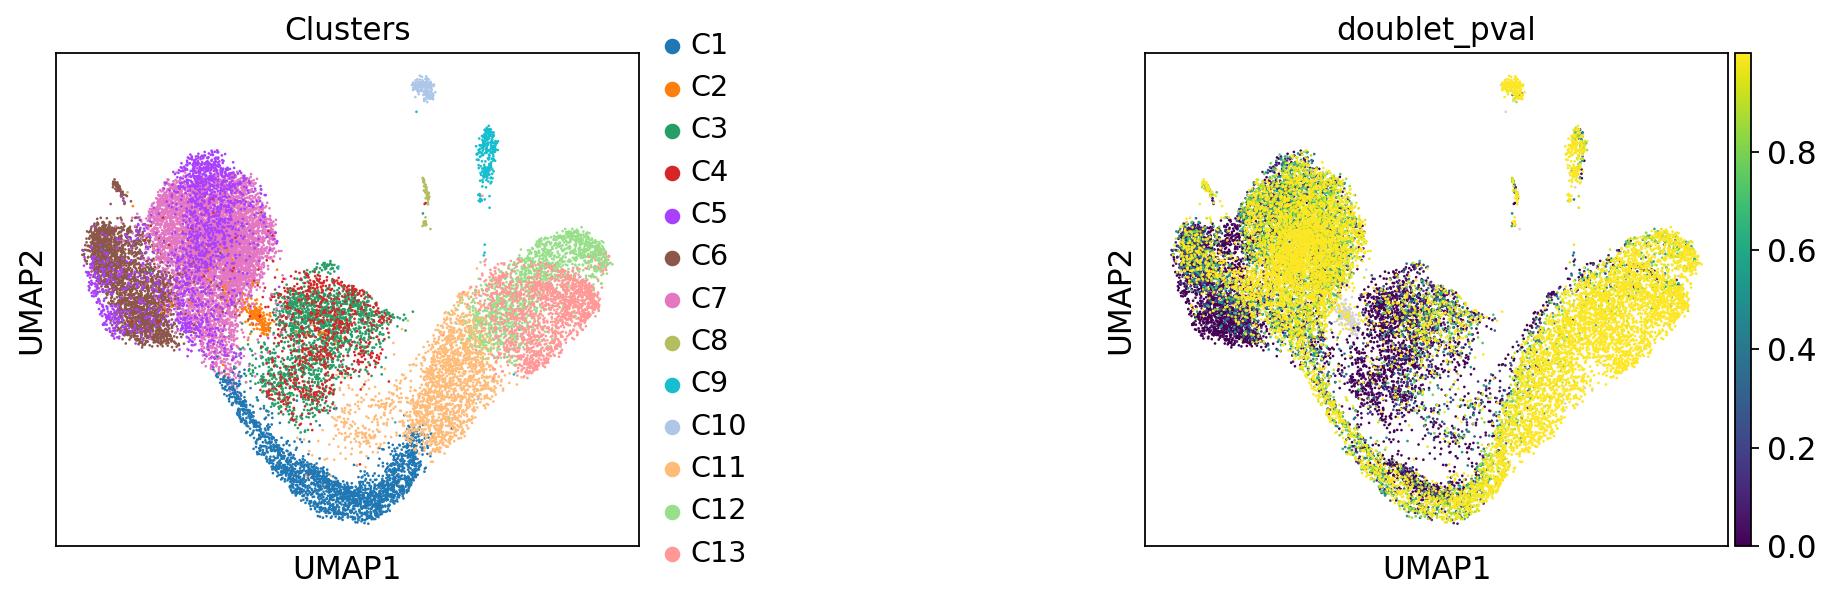

In [16]:
sc.pl.umap(atac,color = ['Clusters','doublet_pval'],wspace=0.7)

In [17]:
atac = atac[~atac.obs['Clusters'].isin(['C3','C4'])] ###remove doublet clusters

In [18]:
combined = ad.concat([rna, atac],join='outer',label='omic',keys=['RNA','ATAC'],index_unique=None)

/data/gaojie/miniforge3/envs/glue/lib/python3.10/site-packages/anndata/_core/merge.py:1356: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [19]:
rna.write('Multi-omics_intergration/output/adata_rna_final.h5ad')

In [20]:
atac.write('Multi-omics_intergration/output/adata_atac_final.h5ad')

In [21]:
###match different sample names across omics
sample_list = []
for i in combined.obs_names:
    if (i.startswith('GW11_C')) | (i.startswith('Sulcus')):
        sample_list.append('Sulcus')
    elif (i.startswith('GW11_G')) | (i.startswith('Adjacent')):
        sample_list.append('Adjacent')
    elif (i.startswith('GW11_D')) | (i.startswith('Distant')):
        sample_list.append('Distant')
combined.obs['region'] = sample_list

In [22]:
combined

AnnData object with n_obs × n_vars = 46743 × 418953
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample', 'celltype', 'omic', 'celltype_sample', 'balancing_weight', 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'doublet_pval', 'doublet_qval', 'doublet', 'Clusters', 'ReadsInPeaks', 'FRIP', 'region'
    obsm: 'X_draw_graph_fr', 'X_pca', 'X_umap', 'X_glue', 'X_lsi', 'X_lsi_harmony'
    layers: 'counts'

In [23]:
combined.write('Multi-omics_intergration/output/adata_combined.h5ad')

In [24]:
np.savetxt("Multi-omics_intergration/output/emb_glue_array.csv", combined.obsm['X_glue'], delimiter=",")

In [25]:
combined.obs[['sample','celltype','Sample','omic','region']].to_csv('Multi-omics_intergration/output/emb_glue_meta.csv')